# Scikit-learn
### 重回帰分析
- **外れ値除去法 & scaling を考慮した重回帰分析**

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

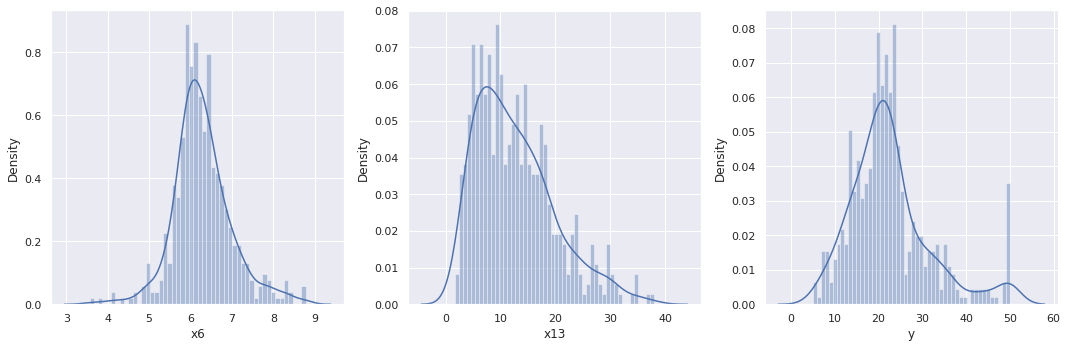

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.set(context='notebook')
sns.distplot(df['x6'], bins=50, ax=ax[0])
sns.distplot(df['x13'], bins=50, ax=ax[1])
sns.distplot(df['y'], bins=50, ax=ax[2])
fig.tight_layout()                         # ticks が被らないようにする

## 外れ値除去 ( 3$\sigma$法 )
- 1変数に適用

In [14]:
col = 'x6'

In [19]:
# 平均
mean = df.mean()
mean[col]

6.284634387351787

In [20]:
# 標準偏差 : standard deviation
sigma = df.std()
sigma[col]

0.7026171434153237

In [24]:
low = mean[col] -3 * sigma[col]
high = mean[col] +3 * sigma[col]
print(f'low:\n{low}\n\nhigh:\n{high}')

low:
4.176782957105816

high:
8.392485817597757


In [26]:
df2 = df[(df[col] > low) & (df[col] < high)]

In [27]:
len(df)

506

In [28]:
len(df2)

498

### 3$\sigma$法後の分布の確認

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


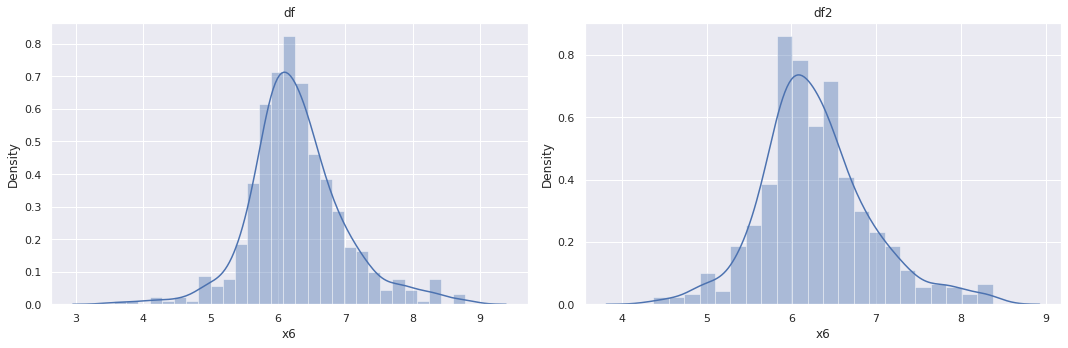

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.set(context='notebook')
sns.distplot(df['x6'], ax=ax[0])
sns.distplot(df2['x6'], ax=ax[1])
ax[0].set_title('df')
ax[1].set_title('df2')
fig.tight_layout()                         # ticks が被らないようにする

- *df, df2 を比べると外れ値を除外した df2 の両端が除外されている*

## 外れ値除去 ( 3$\sigma$法 )
- 全ての変数に適用

In [39]:
cols = df.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [40]:
_df = df
for col in cols:
    
    # ３σ法の上下限値を設定
    low = mean[col] -3 * sigma[col]
    high = mean[col] +3 * sigma[col]
    
    # 条件での絞り込み
    _df = _df[(_df[col] > low) & (_df[col] < high)]

In [41]:
_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [42]:
len(df)

506

In [43]:
len(_df)

415

- **沢山減りすぎた原因**
    - data が正規分布に沿ってなかった
    - 変数の数が 14個あったので
        - 0.3%　*　変数　=　3$\sigma$法　なので、変数が多いほど減る数が多くなる


- **sample　が減りすぎるのがネックとなるのであれば**
    - *外れ値*　->　平均値・中央値に置き換える（補完）対処法をする
    

### 対処法(補完方法)
- 外れ値は取り除く
- 外れ値を平均値・中央値などで埋める
- 主成分分析等を使って、潜在変数に変換した後に3$\sigma$法を適用　<-　sampleが減る量を調整できる

# model 構築
- **外れ値を除去した data を利用してmodelを作成**

### 入力変数と出力変数に分割

In [52]:
_df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [53]:
X = _df.iloc[:,:-1]
y = _df.iloc[:,-1]

### 訓練データと検証データに分割

In [54]:
from sklearn.model_selection import train_test_split

In [58]:
# 訓練データと検証データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

## 重回帰分析

In [60]:
# scikit-learn import : 重回帰分析のみ
from sklearn.linear_model import LinearRegression

# model の宣言
model = LinearRegression()

# model の学習 : paramertor の調整
model.fit(X_train, y_train)

LinearRegression()

In [64]:
# 検証 <- 訓練data
model.score(X_train, y_train)

0.7972109224535134

In [65]:
# 検証 <- 検証data
model.score(X_test, y_test)

0.6253776004329599

- 外れ値除去を行なったので、訓練データの検証の数値は上がった

- 検証データは、かなり下がってしまった
    - **訓練は上がるが、検証データは落ちる**


- <u>上記のような状況を　**過学習**　という</u>
    - Over fiting
    - *重回帰分析は過学習を避けるというのが難しいので data のクレンジングが大切*


- 他の機械学習は、ハイパーパラメーターというものがある
    - <u>人間側で調整して　**過学習**　を避けるという手法がとられる<u>

## スケーリング
- Scikit-learn は非常に優秀で前処理もしてくれる
    - **preprocessing　:　StandardScaler**
        - <u>data　の標準化を行なってくれる</u>

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
# scalerの宣言
scaler = StandardScaler()

In [68]:
# scalerの学習 <- に平均と標準偏差を計算
scaler.fit(X_train)

StandardScaler()

- **X の train data を使用する事**
    - <u>基本的には　test data　は test の時しか使用しない</u>


- `scaling　の学習にも　model　の学習にも一切使わない条件になっている`

In [69]:
# scaling
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

In [70]:
X_train2

array([[-0.44982613, -0.47117023, -0.01455847, ...,  0.3716043 ,
         0.06655172, -0.73371428],
       [-0.45396528, -0.47117023, -0.7386746 , ...,  0.3716043 ,
         0.38053452, -0.32783019],
       [-0.19959841, -0.47117023,  1.29482264, ..., -1.75496677,
        -0.18177662, -0.75722108],
       ...,
       [ 0.49446336, -0.47117023,  1.07385525, ...,  0.84417564,
         0.27992872, -0.12097034],
       [-0.45659855,  0.61013288, -0.5893723 , ...,  0.08806149,
         0.44754069, -0.88259069],
       [-0.47327932, -0.47117023, -0.7386746 , ...,  0.3716043 ,
         0.44754069, -0.54095851]])

- scaler を使用する事で簡単に scaling を行うことができた　=　**標準化ができた**

In [71]:
# modelの宣言
model = LinearRegression()

# model の学習 : paramertor
model.fit(X_train2, y_train)

LinearRegression()

In [72]:
# 検証 <- 訓練データ
model.score(X_train2, y_train)

0.7972109224535134

In [73]:
# 検証 <- 検証データ
model.score(X_test2, y_test)

0.6253776004329595

- 重回帰分析は　scaling　で精度が変わる手法では無いので scaling 前後での変化はない


- **今回の目的は　$\omega$　（重み）　を確認して、どれが重要なモノかを検証**

In [76]:
# 重みの確認 : ここが本題
np.set_printoptions(precision=2, suppress=True)
model.coef_

array([-0.2 ,  0.21,  0.51,  0.  , -1.21,  3.92, -0.37, -1.86,  1.17,
       -1.53, -1.87,  0.24, -2.76])

- **np.set_printoptions(precision=3)**
    - *小数点以下が指定した数で表示できる*
    

- **suppress=True**
    - *指数関数の表示が禁止になる*

- **3.92 = index[ 6 ] 番目が重要である可能性がある**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


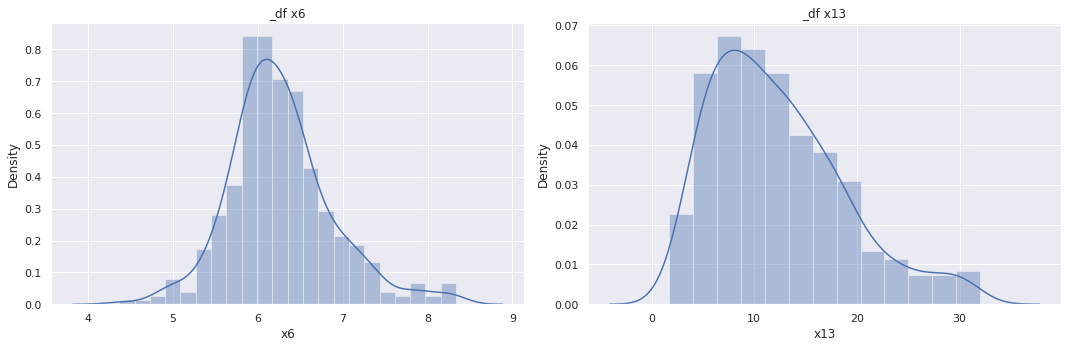

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.set(context='notebook')
sns.distplot(_df['x6'], ax=ax[0])
sns.distplot(_df['x13'], ax=ax[1])
ax[0].set_title('_df x6')
ax[1].set_title('_df x13')
fig.tight_layout()                         # ticks が被らないようにする

- 正規分布として綺麗に表示されている者が重要度が高い事が窺える

- scaling をする事によって scale を統一し　$\omega$　（重み）の値を見比べる要因として使用できる

- プレゼンする際の解析する際の目安になる